In [14]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [15]:
n = 10
A = np.eye(n)*np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [16]:
func = lambda x: 0.5 * x.T @ A @ x - b.T @ x
grad = lambda x: A @ x - b

In [17]:
def func_h(xk, h, func, grad):
    return func(xk - h * grad)

In [18]:
def bin_pow_ray(a, b, xk, grad):
    c = (a + b) / 2
    if func_h(xk, c, func, grad) <= func_h(xk, b, func, grad):
        return ternary_search(a, b, xk, grad)
    else:
        return bin_pow_ray(c, 2 * b, xk) 

In [19]:
def ternary_search(a, b, xk, grad):
    while abs(a - b) < 1e-6:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func_h(xk, c, func, grad) >= func_h(xk, d, func, grad):
            a = c
        else:
            b = d
    return a

In [20]:
def similar_triangles():  
    xk = x0
    res = [func(xk)]
    while True:
        hk = bin_pow_ray(0, 1, xk, grad(xk))
        xk = g.gradient_step(xk, grad(xk), hk) 
        res.append(func(xk))
        if abs(res[-1] - res[-2]) < 1e-6:
            break
    return res        

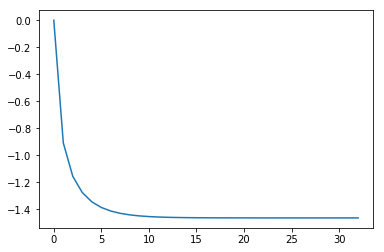

In [21]:
plt.plot(res)
plt.show()